# Ejercicion de programación - Regresión Logistica

In [416]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [417]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split


## 1 Carga y Muestra de los Datos del Dataset

In [418]:
# Cargar los datos desde el archivo CSV usando pandas
data = pd.read_csv('/content/drive/MyDrive/InteligenciaArtificial1/Laboratorio3/waterQuality1.csv', delimiter=',', encoding='utf-8')

# Reemplazar todos los valores NaN por 0 (si aplica)
data.fillna(0, inplace=True)

X = data.iloc[:, :-1].values  # Selecciona todas las columnas excepto la última
y = data.iloc[:, -1].values   # Selecciona solo la última columna

# Mostrar las primeras filas del dataset para verificar la carga
data


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7992,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7993,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7994,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


# Separamos los datos de entrenamiento 80% y prueba 20%


In [419]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las dimensiones de los conjuntos de entrenamiento y prueba
print(f'X_train: {X_train.shape}, X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}, y_test: {y_test.shape}')

X_train: (6396, 20), X_test: (1600, 20)
y_train: (6396,), y_test: (1600,)


# Normalizamos los datos para un mejor manejo de datos

In [420]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el escalador y transformar el conjunto de entrenamiento
X_train = scaler.fit_transform(X_train)

# Transformar el conjunto de prueba utilizando el mismo escalador
X_test = scaler.transform(X_test)

# Verifica las primeras filas para asegurarte de que los datos han sido normalizados
print(X_train[:5])
print(X_test[:5])


[[-0.46001722  1.00069649 -0.28079184  0.06092466  0.20647133 -0.83369488
  -0.76472468 -1.00212422 -0.58563914  0.39622784 -0.85212554 -1.28830775
   1.62130167 -0.83160688  1.2915596  -0.85087005  1.26023824  1.39962141
  -0.61048898 -0.17962468]
 [-0.51543167  1.02094028 -0.47840986  1.50416225 -1.12678523  0.19338231
   0.80515328 -0.61868218  0.24401451  0.82147206  0.68836134  0.31256781
  -0.60076772  0.52236957 -0.72778818  1.13178484 -0.50070953 -1.03109425
   0.57518018  0.56158788]
 [ 2.98359541  0.93546652  3.07871445  0.12690124  2.4285656  -0.17620986
   1.59009226  0.70035845 -0.4243176  -0.97062856  1.11186289 -1.52929977
  -0.91485389  0.24463081  1.62811757  0.47952909 -0.81146502 -1.03109425
  -0.88946997  0.56158788]
 [-0.44418452  0.55645789 -0.43888626 -1.15964198  0.7619949  -0.62750135
  -0.91423687  1.75865848  0.88930068  1.88458259  1.61477098 -0.90960601
  -1.00149835 -0.03310795  0.95500164 -0.41528251 -0.5956626  -0.68384916
  -0.74997948 -1.29144352]
 [-0

# Inclusión de la columna de unos para el término de intercepto

In [421]:
import numpy as np

# Añadir la columna de unos para el término de intercepto al conjunto de entrenamiento y prueba
X_train_ready = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test_ready = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Verificar el tamaño y el contenido del conjunto de entrenamiento preparado
print(f'Tamaño de X_train_ready: {X_train_ready.shape}')
print(f'Tamaño de X_test_ready: {X_test_ready.shape}')

# Imprimir los primeros 10 registros del conjunto de entrenamiento para verificar
print('{:>8}{:>10}{:>10}{:>10}{:>8}{:>10}{:>10}{:>8}{:>10}{:>8}{:>10}{:>10}'.format(
    'X[:,0]', 'X[:,1]', 'X[:,2]', 'X[:,3]', 'X[:,4]', 'X[:,5]', 'X[:,6]',
    'X[:,7]', 'X[:,8]', 'X[:,9]', 'X[:,10]', 'X[:,11]'
))

print('-' * 130)

for i in range(10):
    print('{:8.3f}{:10.3f}{:10.3f}{:10.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:10.3f}{:8.3f}{:10.3f}{:10.3f}'.format(
        X_train_ready[i, 0], X_train_ready[i, 1], X_train_ready[i, 2], X_train_ready[i, 3], X_train_ready[i, 4],
        X_train_ready[i, 5], X_train_ready[i, 6], X_train_ready[i, 7], X_train_ready[i, 8], X_train_ready[i, 9],
        X_train_ready[i, 10], X_train_ready[i, 11]
    ))

Tamaño de X_train_ready: (6396, 21)
Tamaño de X_test_ready: (1600, 21)
  X[:,0]    X[:,1]    X[:,2]    X[:,3]  X[:,4]    X[:,5]    X[:,6]  X[:,7]    X[:,8]  X[:,9]   X[:,10]   X[:,11]
----------------------------------------------------------------------------------------------------------------------------------
   1.000    -0.460     1.001    -0.281   0.061     0.206    -0.834  -0.765    -1.002  -0.586     0.396    -0.852
   1.000    -0.515     1.021    -0.478   1.504    -1.127     0.193   0.805    -0.619   0.244     0.821     0.688
   1.000     2.984     0.935     3.079   0.127     2.429    -0.176   1.590     0.700  -0.424    -0.971     1.112
   1.000    -0.444     0.556    -0.439  -1.160     0.762    -0.628  -0.914     1.759   0.889     1.885     1.615
   1.000    -0.476    -1.562    -0.597  -0.558    -0.071    -0.834  -0.802    -0.573  -0.194    -0.971    -0.873
   1.000    -0.468    -0.045    -0.241  -0.360    -0.349    -0.799  -0.615    -0.143  -0.586    -0.971    -0.855
   1.00

# Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`.

In [422]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [423]:
import numpy as np
import matplotlib.pyplot as plt

def plotData(X, y):
    # Gráfica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y o para los negativos.

    # Crea una nueva figura
    fig = plt.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

Se llama a la función implementada para mostrar los datos cargados:

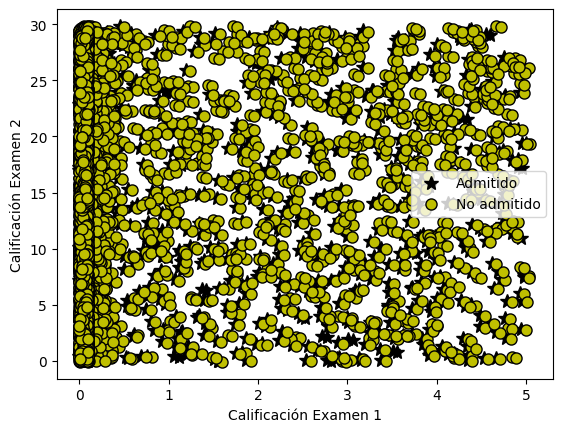

In [424]:
plotData(X, y)
# adiciona etiquetas para los ejes
plt.xlabel('Calificación Examen 1')
plt.ylabel('Calificación Examen 2')
plt.legend(['Admitido', 'No admitido'])
pass

# Implementacion Fución Sigmoidea

In [425]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. Se recomienda experimentar con otros valores de `z`.

In [426]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]



# Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [427]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [428]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [429]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

# Calculo de los Valores de Theta

In [430]:
# Inicializar theta con la misma cantidad de x_train_ready
theta = np.zeros(X_train_ready.shape[1])

# Definir parámetros de entrenamiento
num_ite = 1000
alpha = 0.09

# Ejecutar el descenso por gradiente
theta, J_history = descensoGradiente(theta, X_train_ready, y_train, alpha, num_ite)

# Imprimir los resultados
print(f"Los valores de theta calculados son: {theta}")
print(f"Con un costo de: {J_history[-1]}")

Los valores de theta calculados son: [-2.82374869  0.8361175  -0.20853728 -0.66576089  0.10818363 -0.71703286
  0.41660988  0.31472884 -0.19532947  0.02791189  0.14428084 -0.36058646
 -0.0616317  -0.26748314 -0.13642196 -0.06011217 -0.40317524 -0.1227115
 -0.15445353 -0.16519414 -0.32913297]
Con un costo de: 0.2427441847809571


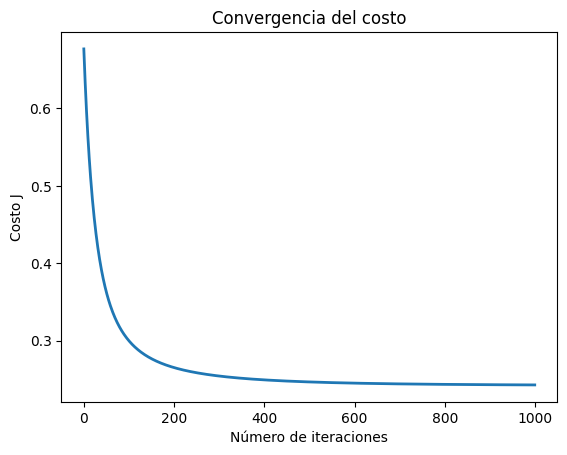

In [431]:
# Graficamos la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.title("Convergencia del costo")
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

#Predicción con los Valores de Theta Calculados

In [432]:
import numpy as np

print(f'Valor de Y en el dataset: {y_test[28]}') #Agua segura
X_array = np.array(X_test_ready[28])

# Calcula la predicción
y_predicted = sigmoid(np.dot(X_array, theta))

# Verifica si el agua es segura o no
if y_predicted >= 0.5:
    print(f'Con las características dadas, el agua se clasifica como segura: {y_predicted}')
else:
    print(f'El agua no se clasifica como segura: {y_predicted}')


Valor de Y en el dataset: 1
Con las características dadas, el agua se clasifica como segura: 0.7419220748970302


#Implementación de la función costFunction

In [433]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [434]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X, y)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[3.85942971e-01 1.22867684e-01 5.57525888e+00 7.22271136e-02
 5.70005628e-01 1.94534767e-02 6.88071536e-01 7.97592546e-02
 3.04918709e-01 2.96904702e-01 1.25703477e-01 1.38524762e-01
 3.85589670e-02 3.91668084e+00 5.04682966e-01 2.03876938e-03
 5.92882504e+00 1.07919272e+00 1.94578539e-02 5.23549275e-02
 1.78876938e-02]
Gradiente en theta inicial (zeros):
	[0.3859, 0.1229, 5.5753]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [435]:
# Define test_theta for your dataset (ensure it matches the number of features + 1 for the intercept)
test_theta = np.zeros(X_train_ready.shape[1])  # Or use specific values if you want to test with known values

# Calculate cost and gradient
cost, grad = costFunction(test_theta, X_train_ready, y_train)

print('Costo en theta prueba: {:.3f}'.format(cost))
# Here, you'll have to estimate the expected cost based on your data or use a calculated value
print('Costo esperado (aproximado): [Estimate or calculate based on your data]\n')

print('Gradiente en theta prueba:')
print('\t{}'.format(grad))
# As with the cost, you would have to calculate the expected gradient based on your data.
print('Gradiente esperado (aproximado):\n\t[Calculate based on your data]')


Costo en theta prueba: 0.693
Costo esperado (aproximado): [Estimate or calculate based on your data]

Gradiente en theta prueba:
	[ 3.88680425e-01 -1.05141484e-01  8.46055550e-03  3.90375251e-02
 -2.62006354e-02  8.05814127e-02 -5.83702758e-02 -5.71076150e-02
 -1.07305556e-02 -2.19016515e-04  8.71993124e-03  3.19984660e-02
 -3.89015147e-04  2.18142305e-02 -1.37491012e-02  8.71709533e-03
 -2.37217152e-02 -1.98609058e-02  1.20081525e-02 -3.14788513e-02
  2.37620672e-02]
Gradiente esperado (aproximado):
	[Calculate based on your data]


# Evaluación de la regresión logistica

In [436]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [437]:
import numpy as np

print(f'Valor de Y en el dataset: {y_test[82]}') #Agua segura
X_array = np.array(X_test_ready[82])

# Realiza la predicción usando el modelo entrenado
y_predicted = predict(theta, X_array)

# Verifica si el agua es segura o no
if y_predicted == 1:
    print(f"Con las características dadas, el agua se clasifica como segura.")
else:
    print(f"El agua no se clasifica como segura.")

# Imprimir la precisión en el conjunto de entrenamiento
p = predict(theta, X_test_ready)
print(f'Precisión de entrenamiento: {np.mean(p == y_test) * 100:.2f} %')
print('Precisión esperada (aproximadamente): 89.00 %')


Valor de Y en el dataset: 1
Con las características dadas, el agua se clasifica como segura.
Precisión de entrenamiento: 90.25 %
Precisión esperada (aproximadamente): 89.00 %
